In [2]:
using Distributions
using StatsPlots
using Turing
using Logging
using LaTeXStrings

default(labels=false)

# Code 2.1

Vector => Vectorization => Vectoring 矢量计算

In [27]:
@show ways = [0, 3, 8, 9, 0]
@time @show ways = ways ./ sum(ways)
println(ways)

ways = [0, 3, 8, 9, 0] = [0, 3, 8, 9, 0]
ways = ways ./ sum(ways) = [0.0, 0.15, 0.4, 0.45, 0.0]
  0.000334 seconds (183 allocations: 14.430 KiB)
[0.0, 0.15, 0.4, 0.45, 0.0]


# Code 2.2

In [7]:
@show b = Binomial(9, 0.5)
# pdf = probability density function
pdf(b, 6)

b = Binomial(9, 0.5) = Binomial{Float64}(n=9, p=0.5)


0.16406250000000028

# Code 2.3

In [16]:
# size of the grid
size = 20

# grid and prior
@show p_grid = range(0, 1; length=size)
@show prior = repeat([1.0], size)

# compute likelihood at each value in grid
@show likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]

# compute product of likelihood and prior
@show unstd_posterior = likelihood .* prior

# standardize the posterior, so it sums to 1
@show posterior = unstd_posterior / sum(unstd_posterior);

p_grid = range(0, 1; length = size) = 0.0:0.05263157894736842:1.0
prior = repeat([1.0], size) = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
likelihood = [pdf(Binomial(9, p), 6) for p = p_grid] = [0.0, 1.5181489823498326e-6, 8.185092949557996e-5, 0.0007772922789631156, 0.0035985753655699776, 0.01116094609366413, 0.0266829865137807, 0.05292109914799283, 0.09082697598243351, 0.1383413260166288, 0.18976862279372944, 0.23611465826683412, 0.2666112516843488, 0.27140056190174194, 0.24500508864811482, 0.18976862279372944, 0.11791811757899721, 0.05026670207647313, 0.008853844865064266, 0.0]
unstd_posterior = likelihood .* prior = [0.0, 1.5181489823498326e-6, 8.185092949557996e-5, 0.0007772922789631156, 0.0035985753655699776, 0.01116094609366413, 0.0266829865137807, 0.05292109914799283, 0.09082697598243351, 0.1383413260166288, 0.18976862279372944, 0.23611465826683412, 0.2666112516843488, 0.27140056190174194, 0.24500508864811482, 0.18976862

# Code 2.4

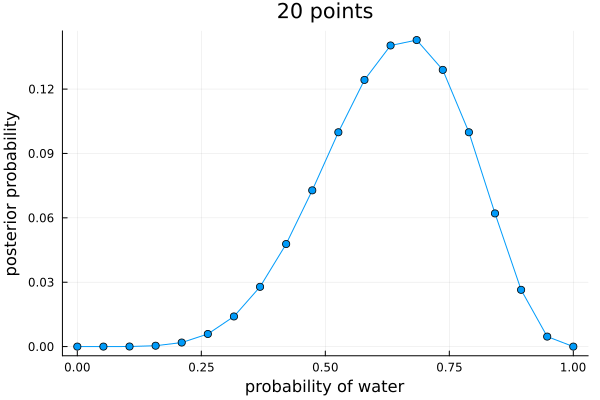

In [9]:
plot(p_grid, posterior; 
    xlabel="probability of water", 
    ylabel="posterior probability",
    title="$size points",
    markershape=:circle
)

# Code 2.5

p_grid = range(0, 1; length = size) = 0.0:0.05263157894736842:1.0
prior = convert(Vector{AbstractFloat}, p_grid .>= 0.5) = AbstractFloat[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  0.000201 seconds (157 allocations: 12.227 KiB)
likelihood = [pdf(Binomial(9, p), 6) for p = p_grid] = [0.0, 1.5181489823498326e-6, 8.185092949557996e-5, 0.0007772922789631156, 0.0035985753655699776, 0.01116094609366413, 0.0266829865137807, 0.05292109914799283, 0.09082697598243351, 0.1383413260166288, 0.18976862279372944, 0.23611465826683412, 0.2666112516843488, 0.27140056190174194, 0.24500508864811482, 0.18976862279372944, 0.11791811757899721, 0.05026670207647313, 0.008853844865064266, 0.0]
  0.066112 seconds (29.84 k allocations: 2.093 MiB, 51.47% gc time, 98.78% compilation time)
unstd_posterior = likelihood .* prior = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18976862279372944, 0.23611465826683412, 0.2666112516843488, 0.27140056190174194

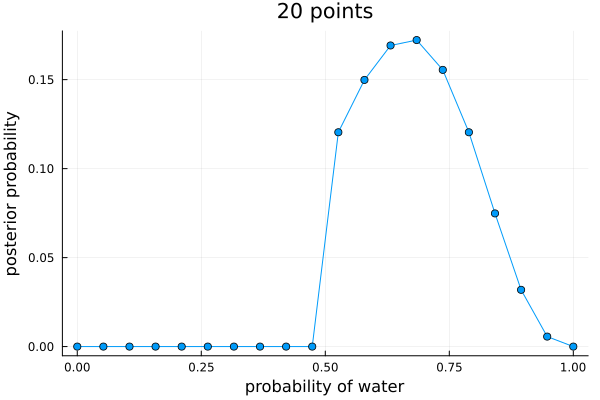

In [21]:
size = 20
@show p_grid = range(0, 1; length=size)

# prior is different - 0 if p < 0.5, 1 if >= 0.5
@time @show prior = convert(Vector{AbstractFloat}, p_grid .>= 0.5)

# another prior to try (uncomment the line below)
# prior = exp.(-5*abs.(p_grid .- 0.5))

# the rest is the same
@time @show likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
@time @show unstd_posterior = likelihood .* prior
@time @show posterior = unstd_posterior / sum(unstd_posterior);

plot(p_grid, posterior; 
    xlabel="probability of water", 
    ylabel="posterior probability",
    title="$size points",
    markershape=:circle
)

# Code 2.6

In [22]:
@show @model function water_land(W, L)
    p ~ Uniform(0, 1)
    W ~ Binomial(W + L, p)
end

@time @show Logging.disable_logging(Logging.Warn)
@time @show chain = sample(water_land(6, 3), NUTS(0.65), 1000)
display(chain)

#= In[22]:1 =# @model(function water_land(W, L)
        #= In[22]:1 =#
        #= In[22]:2 =#
        p ~ Uniform(0, 1)
        #= In[22]:3 =#
        W ~ Binomial(W + L, p)
    end) = water_land
Logging.disable_logging(Logging.Warn) = LogLevel(1001)
  0.000100 seconds (45 allocations: 2.000 KiB)
chain = sample(water_land(6, 3), NUTS(0.65), 1000) = MCMC chain (1000×13×1 Array{Float64, 3})
  1.562452 seconds (1.19 M allocations: 84.541 MiB, 3.39% gc time, 97.05% compilation time: 81% of which was recompilation)


Chains MCMC chain (1000×13×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.87 seconds
Compute duration  = 0.87 seconds
parameters        = p
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           p    0.6354    0.1312    0.0064   403.7129   522.9461    1.0029     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           p    0.3667    0.5471    0.6406    0.7311    0.8613


# Code 2.7

x = range(0, 1; length = 101) = 0.0:0.01:1.0
  0.000176 seconds (58 allocations: 2.859 KiB)
  0.000015 seconds (1 allocation: 32 bytes)
b = Normal(0.6374, 0.1414) = Normal{Float64}(μ=0.6374, σ=0.1414)
  0.000384 seconds (205 allocations: 22.578 KiB)


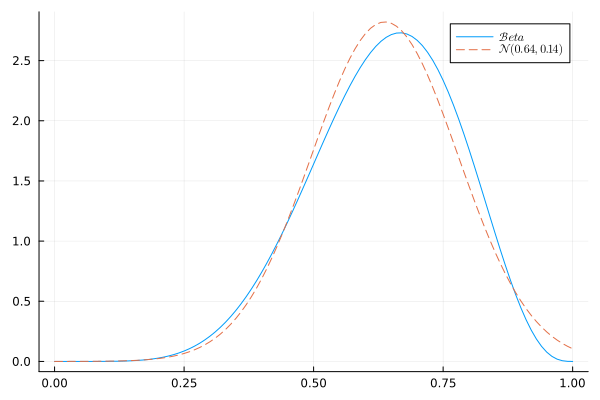

In [26]:
# analytical calculation
W = 6
L = 3
@time @show x = range(0, 1; length=101)

@time b = Beta(W+1, L+1)
plot(x, pdf.(b, x); label = L"\mathcal{Beta}")

# quadratic approximation
@time @show b = Normal(0.6374, 0.1414)
plot!(x, pdf.(b, x); style=:dash, label=L"\mathcal{N}(0.64, 0.14)")

# Code 2.8

In [28]:
# A Metropolis-Hastings algorithm. 
# Sample a p_new from a Normal distribution N(p_old, 0.1)
n_samples = 1000
p = Vector{Float64}(undef, n_samples)
p[1] = 0.5
W, L = 6, 3

@time for i ∈ 2:n_samples
    p_old = p[i-1]
    p_new = rand(Normal(p_old, 0.1))
    if p_new < 0
        p_new = abs(p_new)
    elseif p_new > 1
        p_new = 2-p_new
    end

    q0 = pdf(Binomial(W+L, p_old), W)
    q1 = pdf(Binomial(W+L, p_new), W)
    u = rand(Uniform())
    p[i] = (u < q1 / q0) ? p_new : p_old
end

  0.004570 seconds (11.47 k allocations: 241.609 KiB)


# Code 2.9

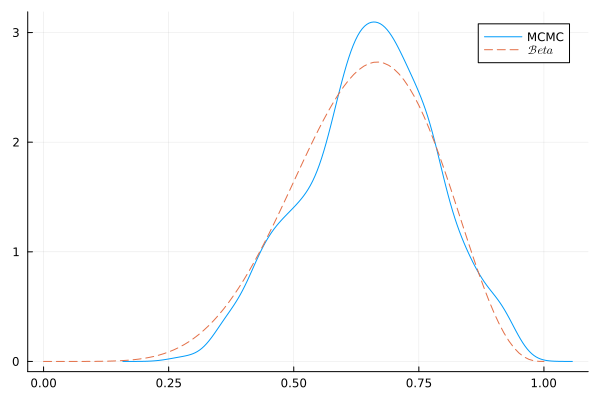

In [15]:
density(p; label = "MCMC")
b = Beta(W+1, L+1)
plot!(x, pdf.(b, x); label = L"\mathcal{Beta}", style=:dash)